# Ensemble

- 다양한 알고리즘으로 모델을 만들고 성능을 비교하기


# 0. 라이브러리 불러오기 및 데이터 준비하기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = '../data/college_pass.csv'
data = pd.read_csv(path)

# 1. 데이터 파악하기

In [3]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기술통계 확인
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE,500.0,316.47200,11.295148,290.0,308.0000,317.00,325.00,340.00
TOEFL,500.0,107.19200,6.081868,92.0,103.0000,107.00,112.00,120.00
RANK,500.0,3.11400,1.143512,1.0,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.0,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.0,3.0000,3.50,4.00,5.00
GPA,500.0,8.57644,0.604813,6.8,8.1275,8.56,9.04,9.92
RESEARCH,500.0,0.56000,0.496884,0.0,0.0000,1.00,1.00,1.00
ADMIT,500.0,0.43600,0.496384,0.0,0.0000,0.00,1.00,1.00


# 2. 데이터 전처리

**1) x, y 분리**

In [5]:
# target 값 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:,target]

**2) 학습용, 평가용 데이터 분리**

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

**3) 정규화**

In [7]:
# 라이브러리 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler =MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 3. 모델링

In [16]:
# xgboost 설치
# !pip install xgboost

In [15]:
# lightgbm 설치
# !pip install lightgbm

In [10]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *

**1) KNN**

In [11]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [12]:
# 학습하기
model.fit(x_train_s, y_train)

KNeighborsClassifier()

In [13]:
# 예측하기
y_pred = model.predict(x_test_s)

In [14]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79  5]
 [15 51]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.91      0.77      0.84        66

    accuracy                           0.87       150
   macro avg       0.88      0.86      0.86       150
weighted avg       0.87      0.87      0.86       150



**2) Decision Tree**

In [19]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [20]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [21]:
# 예측하기
y_pred = model.predict(x_test)

In [22]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.88      0.80      0.84        66

    accuracy                           0.87       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.87      0.87       150



**3) Logistic Regression**

In [23]:
# 선언하기
model = LogisticRegression()

In [24]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
# 예측하기
y_pred = model.predict(x_test)

In [26]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  9]
 [14 52]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.85      0.79      0.82        66

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.85      0.85       150



**4) Random Forest**

In [44]:
# 선언하기
model = RandomForestClassifier(max_depth=5,random_state=1)

In [45]:
# 학습하기
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [46]:
# 예측하기
y_pred = model.predict(x_test)

print(y_pred[:5])
print(y_test[:5].values)

[0 0 1 0 1]
[0 1 1 0 1]


In [65]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [16 50]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        84
           1       0.88      0.76      0.81        66

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.85      0.84       150



['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH']
[0.08659521 0.10525575 0.10656372 0.0905979  0.06048115 0.41586405
 0.13464221]


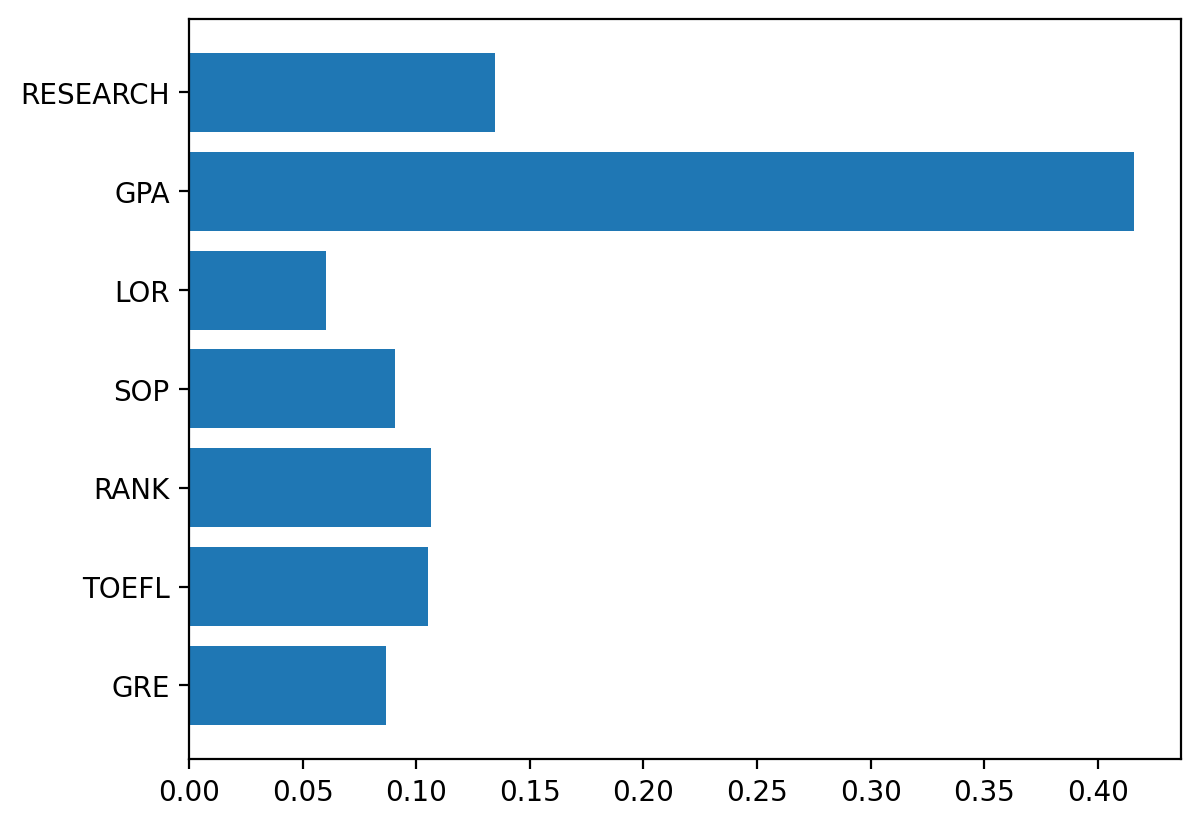

In [66]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

**5) XGBoost**

In [78]:
# 선언하기
model = XGBClassifier(max_depth=5,random_state=1)

In [79]:
# 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [80]:
# 예측하기
y_pred = model.predict(x_test)

In [81]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  6]
 [16 50]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        84
           1       0.89      0.76      0.82        66

    accuracy                           0.85       150
   macro avg       0.86      0.84      0.85       150
weighted avg       0.86      0.85      0.85       150



['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH']
[0.09660268 0.10124905 0.07791392 0.09485425 0.06326618 0.4321137
 0.13400017]


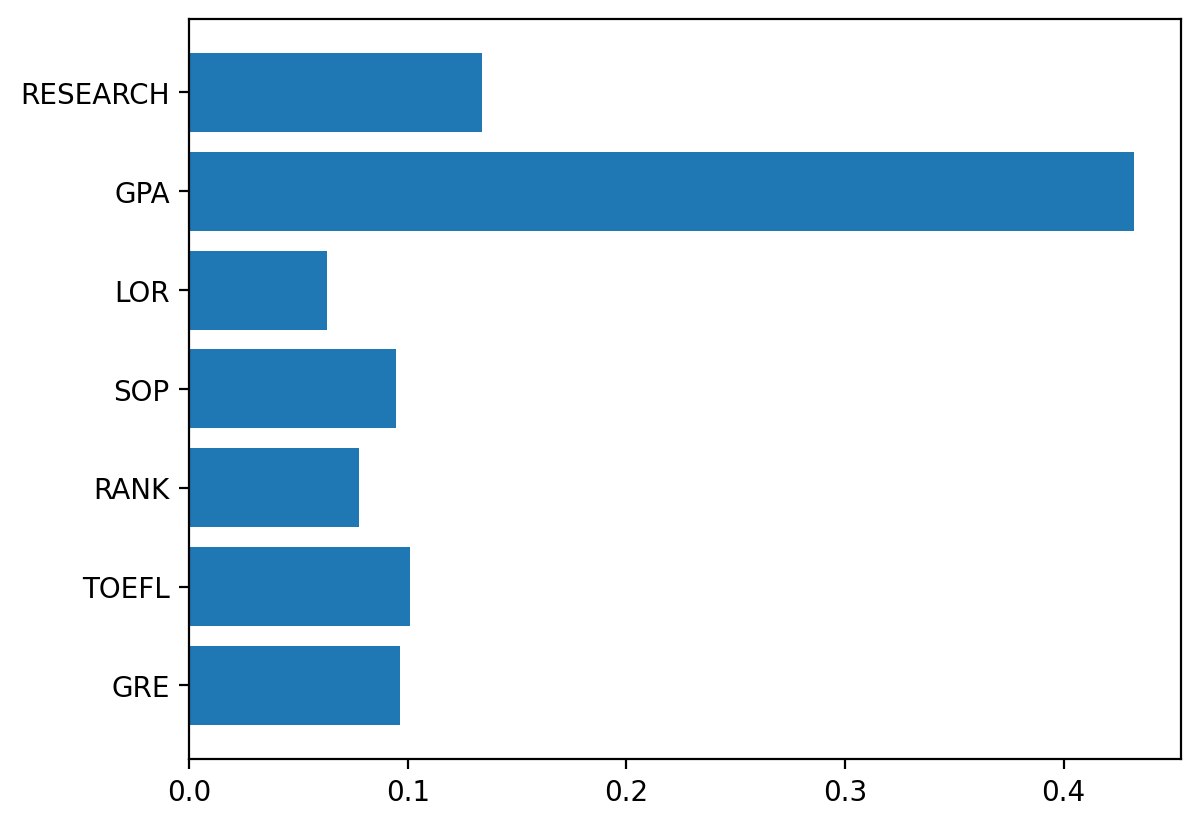

In [82]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()

**6) LightGBM**

In [88]:
# 선언하기
model = LGBMClassifier(random_state=1)

In [89]:
# 학습하기
model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 152, number of negative: 198
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434286 -> initscore=-0.264387
[LightGBM] [Info] Start training from score -0.264387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

LGBMClassifier(random_state=1)

In [90]:
# 예측하기
y_pred = model.predict(x_test)

In [91]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.88      0.80      0.84        66

    accuracy                           0.87       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.87      0.87       150



['GRE', 'TOEFL', 'RANK', 'SOP', 'LOR', 'GPA', 'RESEARCH']
[455 252  83 159 172 508  50]


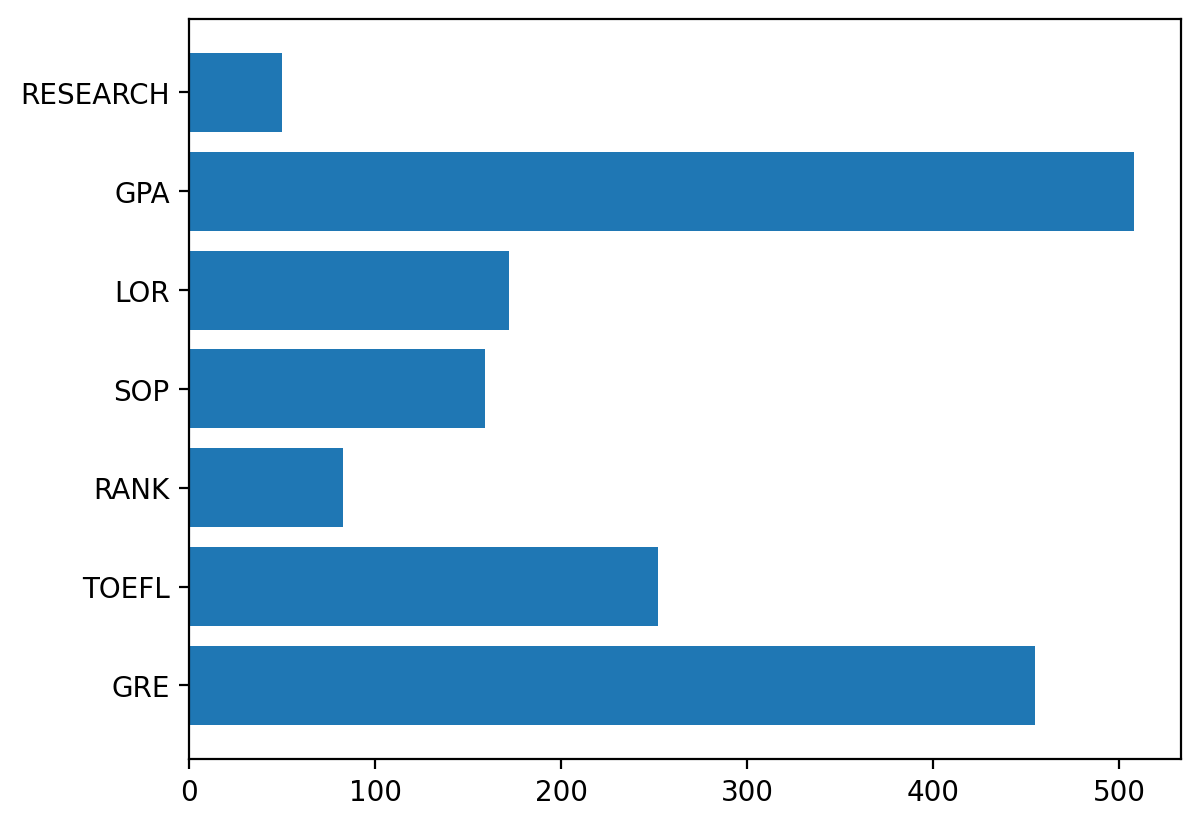

In [92]:
# Feature 중요도 확인
print(list(x))
print(model.feature_importances_)

plt.barh(y=list(x), width=model.feature_importances_)
plt.show()